# Correlation II

## Correlation

**Correlation** is any statistical relationship between two random variables or bivariate data. While the term broadly refers to any statistical association, in its most common use, it refers to the **degree to which a pair of variables are linearly related**.

* **Predictive Value:** Correlations are highly useful because they indicate a **predictive relationship** that can be exploited (e.g., predicting sales from advertising spend).
* **Crucial Caution:** **Correlation does not imply causation.** The example of warm days, ice cream sales, and shark bites illustrates that a third, unmeasured factor (temperature) drives the apparent relationship between the first two variables.

***

## Pearson's $r$ (Correlation Coefficient)

The **Pearson product-moment correlation coefficient** ($\rho$ or $r$) is the standard measure of the linear relationship between two continuous variables.

### Key Properties

* **Linear Relationship:** It specifically measures the strength and direction of a **linear** association.
* **Direction and Strength:** It measures both:
    * **Direction:** The sign ($\text{+}$ or $-$) indicates whether the variables change in the same direction (positive) or opposite directions (negative).
    * **Strength:** The magnitude ranges from $-1$ to $+1$. Values closer to $1$ or $-1$ indicate a stronger linear relationship.
* **Formula:** It is essentially a normalized version of covariance.

$$\rho_{x,y} = \frac{\text{Covariance}(x, y)}{\text{Standard Deviation}(x) \times \text{Standard Deviation}(y)} = \frac{\sum(x-\bar{x})(y-\bar{y})}{\sqrt{\sum(x-\bar{x})^2}\sqrt{\sum(y-\bar{y})^2}}$$

***

## Covariance

**Covariance** measures the extent to which two variables **change together**.

$$\text{Cov}(x, y) = \frac{1}{N} \sum_{i=1}^{N}(x_i - \bar{x}) (y_i - \bar{y})$$

* **Measure of Direction:** Like correlation, its sign indicates direction ($\text{positive}$ or $\text{negative}$).
* **Limitation:** Unlike Pearson's $r$, the magnitude of covariance is not standardized, making it difficult to judge the strength of the relationship. It is scaled by the units of the variables, which is why it's normalized by the standard deviations to create the unitless Pearson's $r$.

***

## Multicollinearity: A Problem of Redundancy

**Multicollinearity** is a specific problem in regression analysis where two or more independent variables (**features**) in a model are highly linearly related to each other.

### Correlation vs. Multicollinearity

| Concept | What it Measures | Context | Desired |
| :--- | :--- | :--- | :--- |
| **Correlation** | How two specific variables (e.g., independent vs. dependent) move together. | Bivariate (two variables) | **High** correlation between independent ($X$) and dependent ($Y$) variables is desired. |
| **Multicollinearity** | A linear relationship (usually high) **between two or more independent features** ($X$ variables). | Multivariate (regression model) | **Low** correlation between independent features is desired. |

### Consequences of Multicollinearity

When two independent variables are highly correlated (e.g., $r > 0.9$):

* It becomes **difficult for the regression model to determine which independent variable is truly influencing the dependent variable**. The effects are confounded.
* This can lead to unstable and counter-intuitive coefficient estimates (e.g., a relevant variable having an incorrect sign or an inflated standard error), making the model unreliable for interpretation.
* **Actionable Thresholds:**
    * Correlations **above $0.9$** are typically considered problematic and require action (e.g., removing one of the correlated features).
    * Correlations **between $0.5$ and $0.7$** may warrant a closer look, though they may not severely harm prediction accuracy; they mainly impact coefficient interpretability.

### Variance Inflation Factor (VIF)

https://towardsdatascience.com/statistics-in-python-collinearity-and-multicollinearity-4cc4dcd82b3f

* Minimum possible value is one
* Values over 10 mean multicollinearity

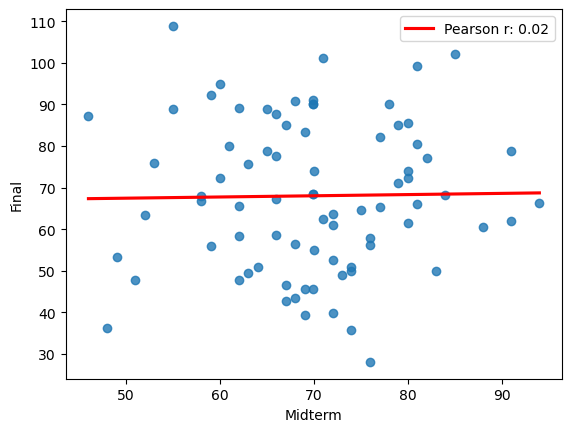

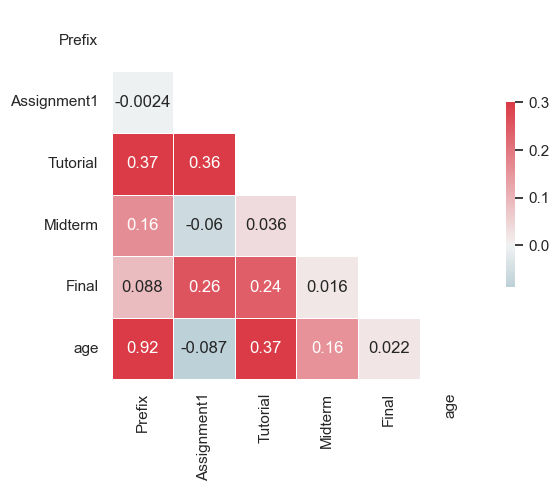

In [ ]:
# correlation heat map
import numpy as np
import seaborn as sns
from scipy import stats

ptext = f"Pearson r: {round(stats.pearsonr(X_train['Midterm'], X_train['Final'])[0], 2)}"
sns.regplot(x='Midterm', y='Final', data=X_train, ci=None,
            line_kws={'color': 'red', 'label': ptext});

plt.legend()
plt.show();

# correlation matrix
sns.set(style="white")

# compute the correlation matrix
corr = X_train.corr()

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
f, ax = plt.subplots()

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

There's not much correlation between the independent variables.

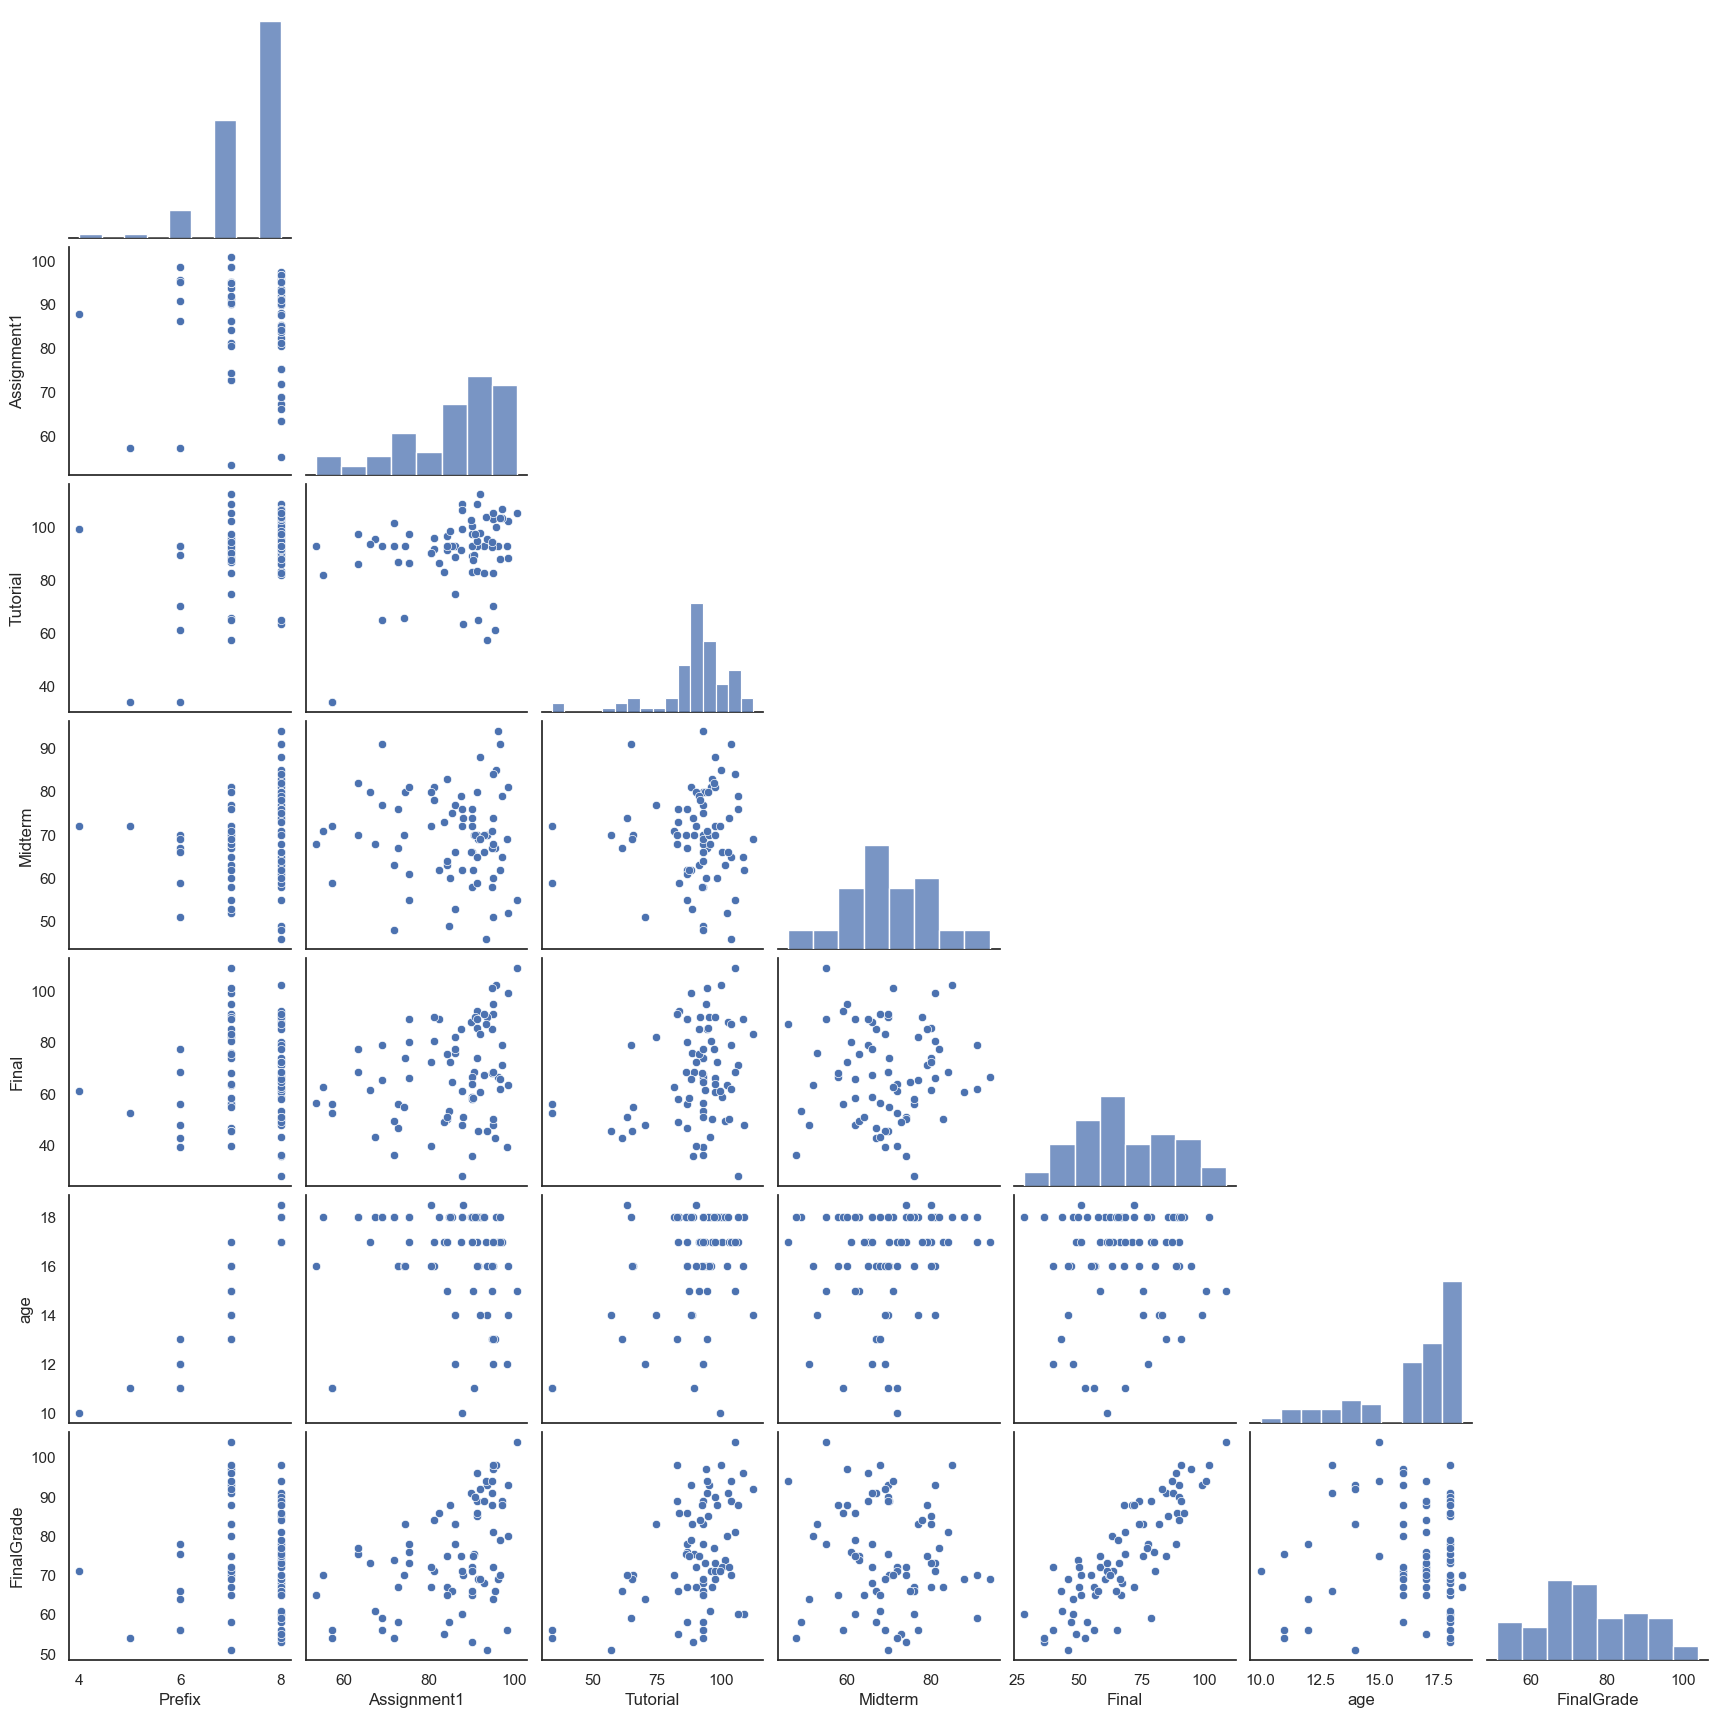

In [ ]:
# sns pairplot
import seaborn as sns

eda_data = X_train.copy()
eda_data['FinalGrade'] = y_train

sns.pairplot(data=eda_data, corner=True);

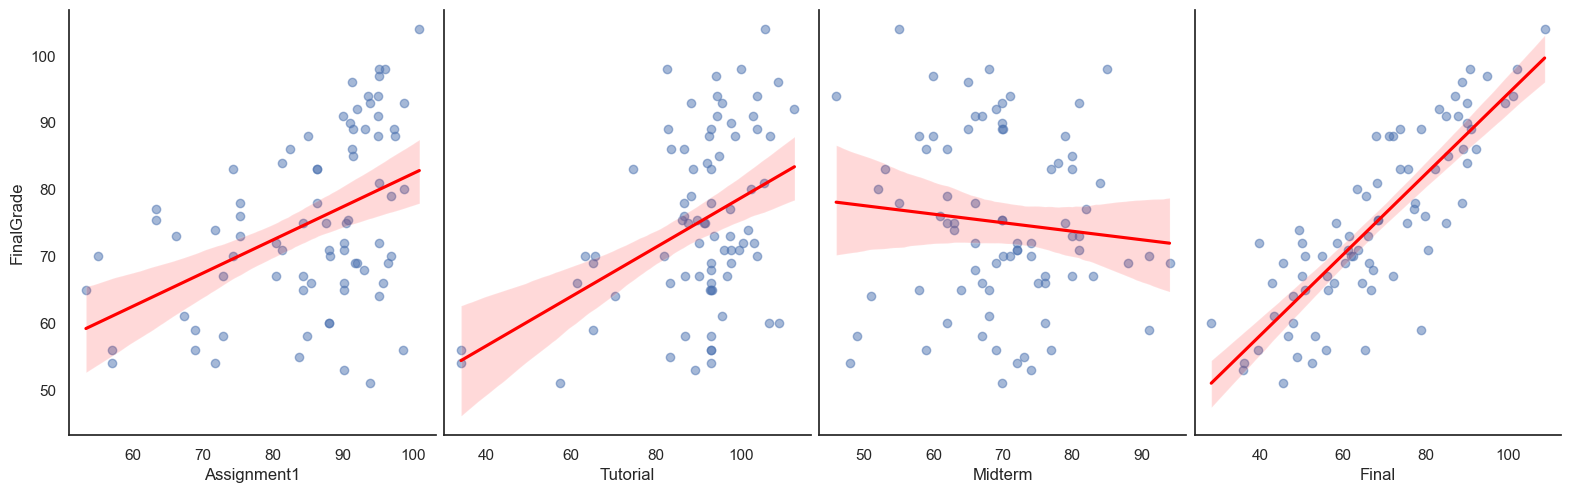

In [ ]:
# scatter plots showing correlation
import pandas as pd
import seaborn as sns

sns.pairplot(data=eda_data, x_vars=['Assignment1', 'Tutorial', 'Midterm', 'Final'], y_vars='FinalGrade',
             kind='reg',
             height=5,
             aspect=0.8,
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.5}});

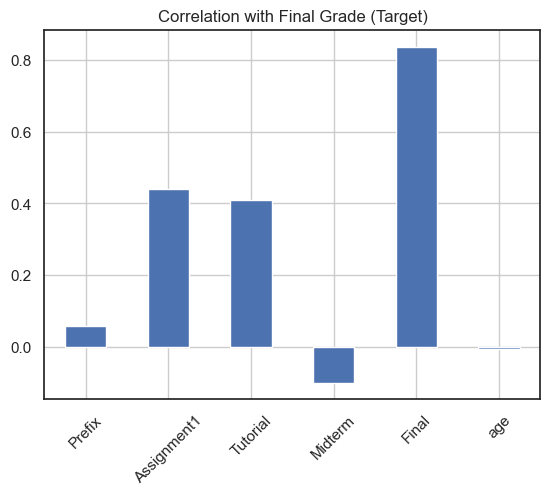

In [ ]:
# correlation with target
X_train.corrwith(y_train).plot.bar(
        title = 'Correlation with Final Grade (Target)', rot = 45, grid = True);

The Final shows more than 80% correlation with the Final Grade